In [1]:
import pandas as pd
import numpy as np

covidData = pd.read_csv('../data/interim/covidData.csv', index_col=0)
rel_census_data = pd.read_csv('../data/interim/rel_census_data.csv', index_col=0)
rent_clean = pd.read_csv('../data/interim/rent_clean.csv', index_col=0)
inv_clean = pd.read_csv('../data/interim/inv_clean.csv', index_col=0)
combined_data = pd.read_csv('../data/processed/combined_data.csv', index_col=0)

In [2]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets, ensemble
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

## Models

#### Baseline

In [3]:
from sklearn.metrics import mean_squared_error

In [4]:
baseline_data_rent_only = combined_data.copy()[['prev_month_rent','rent']]
baseline_data_rent_only

,prev_month_rent,rent
0,2834.0,2850.0
1,3872.0,3848.0
2,5800.0,5595.0
3,6708.0,7000.0
4,2850.0,2875.0
...,...,...
11335,2100.0,2125.0
11336,2950.0,2695.0
11337,1626.0,1699.0
11338,2125.0,2100.0


In [5]:
baseline_mse = mean_squared_error(baseline_data_rent_only['prev_month_rent'], baseline_data_rent_only['rent'])

print("MSE using previous month price: ", baseline_mse)

MSE using previous month price:  60760.319269302374


#### Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
n = 100
X = combined_data.iloc[:,1:]
Y = combined_data.iloc[:,0]
MSE_LR = np.empty([n, 1])

for i in range(100):
  X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.20)
  lr = LinearRegression().fit(X_train, Y_train)
  val = mean_squared_error(Y_test,lr.predict(X_test))
  MSE_LR[i] = val
  #print("MSE: ", mean_squared_error(Y_test,lr.predict(X_test)))
  #print("Mean Error (Magnitude): ", np.sqrt(mean_squared_error(Y_test,lr.predict(X_test))))
  
  feature_coefs = pd.DataFrame(zip(X_train.columns.tolist(), lr.coef_.tolist()),columns=['feature','coef'])
  #print("Feature Coefs: ")
  #print(feature_coefs.sort_values(by='coef',ascending=False).head(5))

print("Mean Square Error Average for 100 trials: ",MSE_LR.mean())
print("Mean Error Average for 100 trials: ", np.sqrt(MSE_LR.mean()))

print("Feature Coefs: ")
print(feature_coefs.sort_values(by='coef',ascending=False).head(20))

Mean Square Error Average for 100 trials:  58679.45662206519
Mean Error Average for 100 trials:  242.23842928417693
Feature Coefs: 
                                              feature        coef
42  employment_status_for_the_population_16_years_...  134.844610
5                      covid_rate_of_increase_prev_mo   78.147294
4                              covid_rate_of_increase   42.418444
7                                             month_2   39.773245
24                                            bd__3.0   30.062589
6                                             month_1   29.782644
16                                           month_11   22.616019
19                                          year_2019   21.755077
13                                            month_8   12.904809
17                                           month_12   12.026572
23                                            bd__2.0    5.826296
18                                          year_2018    5.456156
8         

#### Decision Tree 

In [8]:
from sklearn.tree import DecisionTreeRegressor

In [9]:
N = 100
MSE_DT = np.empty([N, 1])

for i in range(N):
    DT_model = DecisionTreeRegressor(random_state = i)
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 101)
    DT_model.fit(X_train, Y_train)
    DT_result = DT_model.predict(X_test)
    MSE_DT[i] = mean_squared_error(Y_test, DT_result)


print("Mean Square Error Average for 100 trials: ", MSE_DT.mean())
print("Mean Square Error Average for 100 trials: ", np.sqrt(MSE_DT.mean()))

Mean Square Error Average for 100 trials:  74120.60276996989
Mean Square Error Average for 100 trials:  272.25099222954157


#### Gradient Boosted Model (GBM)

In [10]:
from sklearn import datasets, ensemble

In [11]:
N = 5
MSE_GBM = np.empty([N, 1])

for i in range(N):
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = i)
    GBM_reg = ensemble.GradientBoostingRegressor()
    GBM_reg.fit(X_train, Y_train)
    GBM_result = GBM_reg.predict(X_test)
    MSE_GBM[i] = mean_squared_error(Y_test, GBM_result)


print("Mean Square Error Average for 100 trials: ", MSE_GBM.mean())
print("Mean Square Error Average for 100 trials: ", np.sqrt(MSE_GBM.mean()))

Mean Square Error Average for 100 trials:  46863.279118376435
Mean Square Error Average for 100 trials:  216.4792810371848


#### Random Forest (RF)

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
N = 5
MSE_RF = np.empty([N, 1])
X=combined_data.iloc[:,1:]
Y=combined_data.iloc[:,0]

for i in range(N):
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = i)
    RF = RandomForestRegressor()
    RF.fit(X_train, Y_train)
    RF_result = RF.predict(X_test)
    MSE_RF[i] = mean_squared_error(Y_test, RF_result)

# print(MSE_RF)
print("Mean Square Error Average for 100 trials: ", MSE_RF.mean())
print("Mean Error Average for 100 trials: ", np.sqrt(MSE_RF.mean()))

Mean Square Error Average for 100 trials:  42564.332670724325
Mean Error Average for 100 trials:  206.31125192466922


#### Random Forest Fine Tuning 

In [14]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

In [15]:
X=combined_data.iloc[:,1:]
Y=combined_data.iloc[:,0]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [16]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 100, num = 20)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [5, 10,20,30,40,50]

# Minimum number of samples required at each leaf node
min_samples_leaf = [5, 10,20,30,40,50]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               }

In [17]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available core
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [5, 10, 20, 30, 40,
                                                             50],
                                        'min_samples_split': [5, 10, 20, 30, 40,
                                                              50],
                                        'n_estimators': [5, 10, 15, 20, 25, 30,
                                                         35, 40, 45, 50, 55, 60,
                                                         65, 70, 75, 80, 85, 90,
                                                         95, 100

In [18]:
rf_random.best_params_

{'n_estimators': 55,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [19]:
MAE_rf_tuned=[]

for i in range(50):
    X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.20)
    rf_tuned=RandomForestRegressor(bootstrap=True,max_depth=100,max_features='auto',min_samples_leaf=5,min_samples_split=10,n_estimators=55)
    rf_tuned.fit(X_train, Y_train)
    MAE_rf_tuned.append(mean_squared_error(Y_test,rf_tuned.predict(X_test)))

In [20]:
np.array(MAE_rf_tuned).mean()

45642.12366913995

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.20)

rf_tuned=RandomForestRegressor(bootstrap=True,max_depth=100,max_features='auto',min_samples_leaf=5,min_samples_split=10,n_estimators=55)
rf_tuned.fit(X_train, Y_train)
mean_absolute_error(Y_test,rf_tuned.predict(X_test))

101.12286316883448

#### KNN

In [22]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

In [23]:
N = 5
NN = 20 
MSE_KNN = np.empty([N, NN])
X=combined_data.iloc[:,1:]
Y=combined_data.iloc[:,0]


for k in range(NN):
    for i in range(N):
        X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)
        KNN = KNeighborsRegressor(n_neighbors = k+1)
        KNN.fit(X_train, Y_train)
        KNN_result = KNN.predict(X_test)
        MSE_KNN[i][k] = mean_squared_error(Y_test, KNN_result)

print("Mean Square Error Average for 100 trials: ", MSE_KNN.mean())
print("Mean Error Average for 100 trials: ", np.sqrt(MSE_KNN.mean()))
MSE_KNN.mean(axis=0)

Mean Square Error Average for 100 trials:  80805.66928843874
Mean Error Average for 100 trials:  284.26338013968444


array([125194.26327405,  84239.82326113,  70366.65409461,  79483.81050875,
        67975.13495733,  66316.14189328,  71074.22422233,  62064.70943551,
        70686.07519896,  70682.43528962,  78356.36923862,  69722.53589453,
        78894.54261309,  83533.43522423,  87361.07538168,  80517.14973784,
        86406.76530499,  86413.81770019,  93964.98846142, 102859.43407661])

Plot different random states vs. mean squared error.

Mean Square Error Average for 100 trials:  62064.709435511286
Mean Error Average for 100 trials:  249.1278977463409


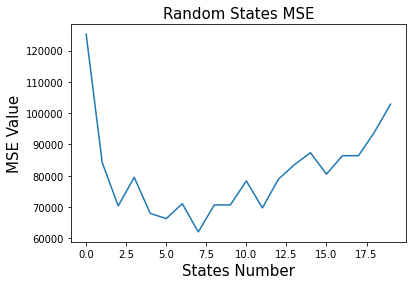

In [24]:
MSE_KNN_mean = MSE_KNN.mean(axis=0)

plt.plot(MSE_KNN_mean)
plt.title('Random States MSE', size=15)
plt.xlabel('States Number',size=15)
plt.ylabel('MSE Value',size=15)

best_MSE = MSE_KNN_mean.min()

print("Mean Square Error Average for 100 trials: ", best_MSE)
print("Mean Error Average for 100 trials: ", np.sqrt(best_MSE))

## Model Evaluation

In [25]:
import seaborn as sns

Compare mean absolute error across models.

In [26]:
baseline_mae = mean_absolute_error(baseline_data_rent_only['prev_month_rent'], baseline_data_rent_only['rent'])

In [ ]:
n = 50
X = combined_data.iloc[:,[1,2,6,43,46]]
# X = combined_data.iloc[:,1:]
Y = combined_data.iloc[:,0]

MAE_LR = []
MAE_DT = []
MAE_GBM = []
MAE_RF = []
MAE_KNN = []

for i in range(50):
    X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.20,random_state=i)
    lr = LinearRegression().fit(X_train, Y_train)
    MAE_LR.append(mean_absolute_error(Y_test,lr.predict(X_test)))

    DT_model = DecisionTreeRegressor()
    DT_model.fit(X_train, Y_train)
    MAE_DT.append(mean_absolute_error(Y_test,DT_model.predict(X_test)))

    GBM_reg = ensemble.GradientBoostingRegressor()
    GBM_reg.fit(X_train, Y_train)
    MAE_GBM.append(mean_absolute_error(Y_test, GBM_reg.predict(X_test)))

    RF = RandomForestRegressor()
    RF.fit(X_train, Y_train)
    MAE_RF.append(mean_absolute_error(Y_test,RF.predict(X_test)))

    KNN = KNeighborsRegressor(n_neighbors = 5)
    KNN.fit(X_train, Y_train)
    KNN_result = KNN.predict(X_test)
    MAE_KNN.append(mean_absolute_error(Y_test, KNN_result))


In [ ]:
MAE=pd.DataFrame(np.arange(1,51),columns=['trial_number'])
MAE['Baseline']=np.repeat(baseline_mae,50)
MAE['Linear Regression']=MAE_LR
MAE['Decision Tree']=MAE_DT
MAE['Gradient Boosted Tree']=MAE_GBM
MAE['Random Forest']=MAE_RF
MAE['K Nearest Neighbors']=MAE_KNN
MAE=MAE.set_index('trial_number')

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=MAE)
plt.xlabel('Trial Number')
plt.ylabel('Mean Absolute Error')
plt.legend(loc="upper right")
plt.show()

In [ ]:
MAE.mean().sort_values()